In [1]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from mlxtend.frequent_patterns import association_rules, apriori

In [64]:
df = pd.read_csv('Groceries_dataset.csv',index_col=0)
df = df.reset_index()
df["itemDescription"] = df["itemDescription"].str.capitalize()
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,Tropical fruit
1,2552,05-01-2015,Whole milk
2,2300,19-09-2015,Pip fruit
3,1187,12-12-2015,Other vegetables
4,3037,01-02-2015,Whole milk


In [65]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [66]:
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 38765
Number of Columns: 3


In [67]:
df.rename(columns={"itemDescription":"Item"},inplace=True)
df.head()

,Member_number,Date,Item
0,1808,21-07-2015,Tropical fruit
1,2552,05-01-2015,Whole milk
2,2300,19-09-2015,Pip fruit
3,1187,12-12-2015,Other vegetables
4,3037,01-02-2015,Whole milk


# Modifying Date Column

In [68]:
df["Year"]= pd.to_datetime(df["Date"]).dt.year
df["Month"] = pd.to_datetime(df["Date"]).dt.month
df["Week Day"] = pd.to_datetime(df["Date"]).dt.weekday
df.head()

,Member_number,Date,Item,Year,Month,Week Day
0,1808,21-07-2015,Tropical fruit,2015,7,1
1,2552,05-01-2015,Whole milk,2015,5,4
2,2300,19-09-2015,Pip fruit,2015,9,5
3,1187,12-12-2015,Other vegetables,2015,12,5
4,3037,01-02-2015,Whole milk,2015,1,4


# Replacing Months and Days with names

In [69]:
df["Month"] = df["Month"].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January ','February','March','April' ,'May' ,'June'  ,'July' ,'August','September','October','November','December'))
df["Week Day"] = df["Week Day"].replace((0,1,2,3,4,5,6),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
df.head()

,Member_number,Date,Item,Year,Month,Week Day
0,1808,21-07-2015,Tropical fruit,2015,July,Tuesday
1,2552,05-01-2015,Whole milk,2015,May,Friday
2,2300,19-09-2015,Pip fruit,2015,September,Saturday
3,1187,12-12-2015,Other vegetables,2015,December,Saturday
4,3037,01-02-2015,Whole milk,2015,January,Friday


# Total Products

In [70]:
all_products = df['Item'].unique()
print("Total products: {}".format(len(all_products)))

Total products: 167


# Displaying Products

In [71]:
df['Item'].value_counts()

Whole milk               2502
Other vegetables         1898
Rolls/buns               1716
Soda                     1514
Yogurt                   1334
                         ... 
Rubbing alcohol             5
Bags                        4
Baby cosmetics              3
Kitchen utensil             1
Preservation products       1
Name: Item, Length: 167, dtype: int64

# Top Customer IDs

In [72]:
df['Member_number'].value_counts()

3180    36
3737    33
3050    33
2051    33
2625    31
        ..
2503     2
3301     2
1775     2
3723     2
2417     2
Name: Member_number, Length: 3898, dtype: int64

# Top 15 frequently sold in the dataset

In [73]:
best_selling = df["Item"].value_counts().reset_index(name='Quantity').head(15)
best_selling.rename(columns={"index":"Item"},inplace=True)

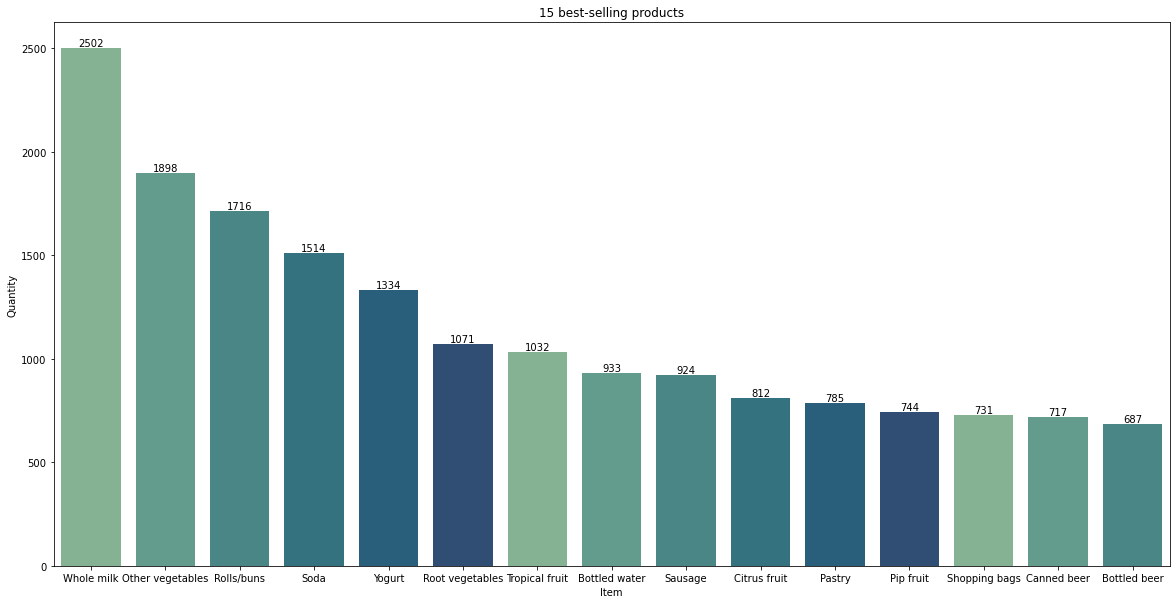

In [74]:
plt.figure(figsize=(20,10))
colors=sns.color_palette('crest')
ax=sns.barplot(x="Item",y="Quantity",data=best_selling,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
plt.title("15 best-selling products")
plt.show()

# Total products sales by years

In [75]:
data_years = df.groupby("Year")["Item"].count().reset_index() 

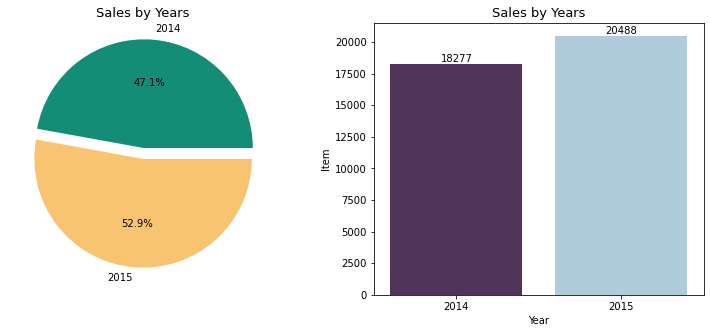

In [76]:
d_years = data_years["Year"].tolist()
data_item = data_years["Item"].tolist()
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
explode=(0.1,0)
colors=sns.color_palette('Paired')
plt.pie(data_item,labels=d_years,autopct='%1.1f%%',explode=explode,colors=("#138D75","#F8C471"))
plt.title('Sales by Years',size=13)
### Bar chart
plt.subplot(1,2,2)
ax=sns.barplot(x="Year",y="Item",data=data_years,palette=("#512E5F","#A9CCE3"))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Sales by Years',size=13)    
plt.show()

# Total products sale by months

In [77]:
per_month = df.groupby('Month')['Item'].count().reset_index()
per_month.rename(columns={"Item":"Quantity"},inplace = True)

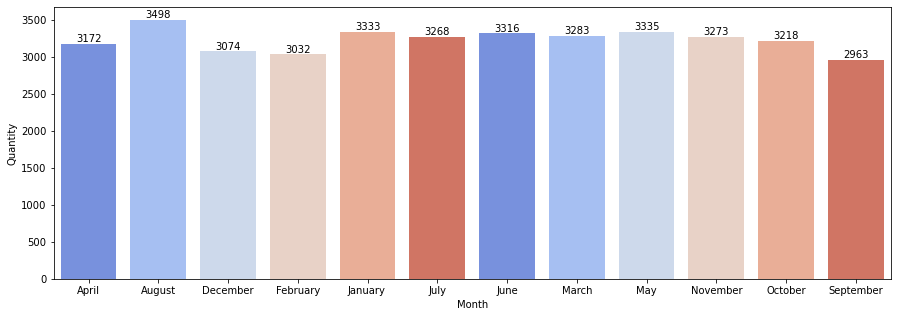

In [78]:
plt.figure(figsize=(15,5))
colors=sns.color_palette("coolwarm")
ax=sns.barplot(x="Month",y="Quantity",data=per_month,palette=colors)
for i in ax.containers:
     ax.bar_label(i)
plt.show()   

# Total product sales by week day

In [79]:
week_day = df.groupby('Week Day')['Item'].count().reset_index(name="Quantity")

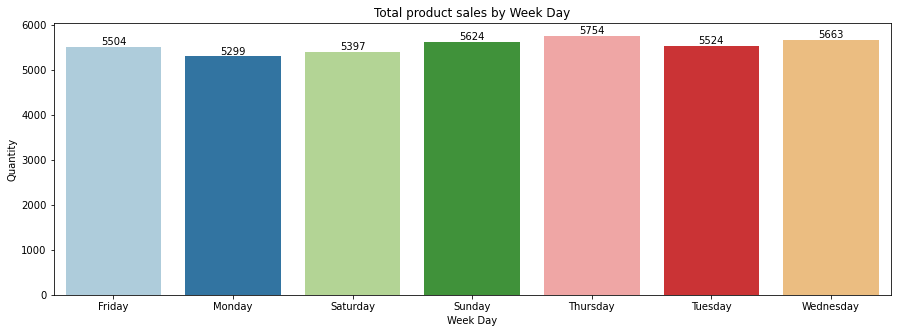

In [80]:
plt.figure(figsize=(15,5))
colors = sns.color_palette("Paired")
ax = sns.barplot(x = "Week Day",y = "Quantity",data = week_day,palette = colors)
plt.title("Total product sales by Week Day")
for i in ax.containers:
    ax.bar_label(i)
plt.show() 

# How many products were sold monthly?

In [81]:
product_sales = df.groupby(["Month","Item"])["Item"].count().reset_index(name="Quantity").sort_values(["Month","Quantity"],ascending=False)

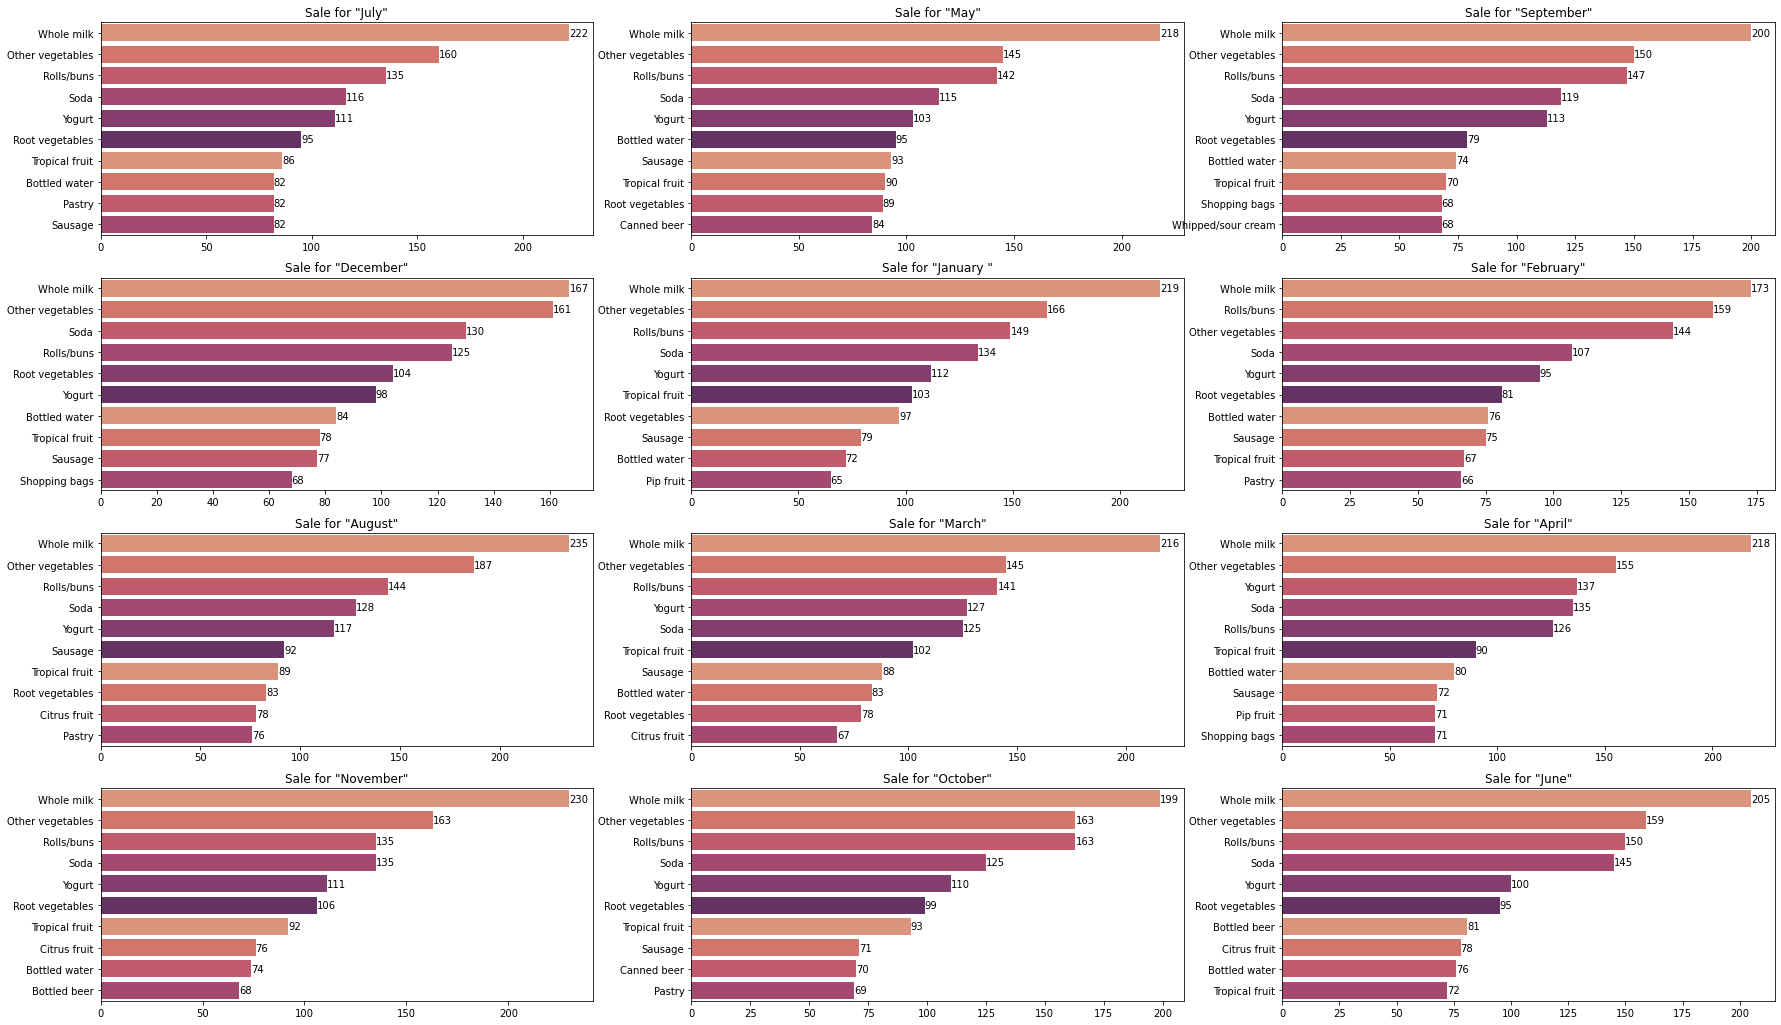

In [82]:
product_sales = df.groupby(["Month","Item"])["Item"].count().reset_index(name="Quantity").sort_values(["Month","Quantity"],ascending=False)
month_info = df["Month"].unique()

plt.figure(figsize=(30,18))
colors = sns.color_palette('flare')
for i,j in enumerate(month_info):
    plt.subplot(4,3,i+1)
    product_data = product_sales[product_sales["Month"]==j].head(10)
    ax = sns.barplot(x="Quantity",y="Item",data=product_data,palette=colors)
    for i in ax.containers:
        ax.bar_label(i)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Sale for "{}"'.format(j))

# One-Hot representation of products purchased

In [83]:
data_quantity = df.groupby(["Member_number","Item"])["Item"].count().reset_index(name="Quantity")
data_quantity.head()

,Member_number,Item,Quantity
0,1000,Canned beer,1
1,1000,Hygiene articles,1
2,1000,Misc. beverages,1
3,1000,Pastry,1
4,1000,Pickled vegetables,1


In [84]:
data_pivot = data_quantity.pivot_table(index="Member_number",columns="Item",values="Quantity",aggfunc="sum").fillna(0)
data_pivot.head()

Item,Abrasive cleaner,Artif. sweetener,Baby cosmetics,Bags,Baking powder,Bathroom cleaner,Beef,Berries,Beverages,Bottled beer,...,Uht-milk,Vinegar,Waffles,Whipped/sour cream,Whisky,White bread,White wine,Whole milk,Yogurt,Zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [85]:
def func(piv):
    if piv <=0:
        return 0
    if piv >=1:
        return 1
data_pivot = data_pivot.applymap(func)
data_pivot.head()

Item,Abrasive cleaner,Artif. sweetener,Baby cosmetics,Bags,Baking powder,Bathroom cleaner,Beef,Berries,Beverages,Bottled beer,...,Uht-milk,Vinegar,Waffles,Whipped/sour cream,Whisky,White bread,White wine,Whole milk,Yogurt,Zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Association Rules

In [87]:
apriori_data = apriori(data_pivot,min_support=0.01,use_colnames=True)
apriori_data.head()

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.031042,(Baking powder)
1,0.119548,(Beef)
2,0.079785,(Berries)
3,0.062083,(Beverages)
4,0.158799,(Bottled beer)


In [92]:
rules = association_rules(apriori_data,metric="lift",min_threshold=1)
rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Baking powder),(Other vegetables),0.031042,0.376603,0.015136,0.487603,1.294740,0.003446,1.216629
1,(Other vegetables),(Baking powder),0.376603,0.031042,0.015136,0.040191,1.294740,0.003446,1.009532
2,(Baking powder),(Rolls/buns),0.031042,0.349666,0.012314,0.396694,1.134493,0.001460,1.077950
3,(Rolls/buns),(Baking powder),0.349666,0.031042,0.012314,0.035216,1.134493,0.001460,1.004327
4,(Soda),(Baking powder),0.313494,0.031042,0.012314,0.039280,1.265396,0.002583,1.008575
...,...,...,...,...,...,...,...,...,...
95,(Berries),(Fruit/vegetable juice),0.079785,0.124936,0.015649,0.196141,1.569937,0.005681,1.088580
96,(Newspapers),(Berries),0.139815,0.079785,0.013340,0.095413,1.195882,0.002185,1.017277
97,(Berries),(Newspapers),0.079785,0.139815,0.013340,0.167203,1.195882,0.002185,1.032886
98,(Berries),(Other vegetables),0.079785,0.376603,0.036942,0.463023,1.229470,0.006895,1.160936
